# 1 . Data Description 

In [4]:
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(gridExtra)


**Dataset: "players.csv"**

**1. General Overview**

**Number of Rows:** 196

**Number of Columns:** 7

**Number of Observations**:1372

**Total Number of Variables**: 7

**Name of Variables:** 
- Character Vectors: experience, hashedEmail, name, gender
- Double (Numerical values with decimals) vectors: played_hours, Age
- Logical (True/False) vector: subscribe

**Dataset Summary: "players.csv"**

**Data Collection Method:** This data was collected by a research group in Computer Science at UBC led by Frank Wood, where player’s actions were recorded. The variables measured included playtime, age, experience, gender, subscription status, and other factors affecting skill and playtime. The project required significant resources, including software licenses, server hardware, and participant recruitment.
 

**Potential Issues:** The dataset has several potential issues, including untidy formatting, inconsistent column names, unclear logical vectors, and inconsistent gender labels (e.g. “Male” vs “M”). Missing values in numerical columns may also hinder interpretation in R. 

**Other Potential Issues not directly visible:** The dataset may have several hidden issues, such as subjective self-reported experience levels, inaccurate playtime if AFK (away from keyboard) time was recorded, and unreliable age due to misreporting by young players.

**Data Summary Statistics**

| Variable Name | Type of Vector | Description | Potential Issues | Mean Values | Standard Deviation | Range
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|  Age   |  Numeric (Interger)  |  Specific Age of the Player in Years  | NA or missing values where the participant did not provide their age| The mean age was 20.52062 years old, indicating most participants may have been aware of the study to participate in it, and were of university age. | The standard deviation was 6.17466725237736 years, indicating the demographic is clustered closer to the mean | 8 years-50 years indiactes even though the range spans a broad range, the low SD (6 years) suggests that most ages are concentrated near the average, with fewer people at the extreme ends. |
| Gender  |  Categorical (Character Vector)  |  Specific Gender of the participant   | NA or missing values where the participant did not provide their age | NOT APPLICABLE | NOT APPLICABLE | NOT APPLICABLE |
|  Experience  |  Categorical (Character Vector)  | Describes a persons self-ranked proficiency at playing the game | This category is subjective. The skill level of a person can depend on what their personal objective to playing the game was, and personal bias | NOT APPLICABLE |NOT APPLICABLE | NOT APPLICABLE | NOT APPLICABLE |
|  Subscribe | Logical Vector  |  Describes whether a person is subscribed to Minecraft  | Issues during analysis may occur if significant outliers may skew the data. | NOT APPLICABLE |NOT APPLICABLE | NOT APPLICABLE | NOT APPLICABLE |
|  Name  |  Categorical (Character Vector) |  Specific players name | If not considered a factor already in the data, then R may interpret the letters of a person name into code, making wrangling and interpreting the data more difficult without tidying.| NOT APPLICABLE |NOT APPLICABLE | NOT APPLICABLE | NOT APPLICABLE |
|  HashedEmail  | Categorical (Character Vector)  |  A persons email, encrypted for communication but used for identification by researchers  | If not considered a factor already in the data, then R may interpret the letters of a person name into code, making wrangling and interpreting the data more difficult without tidying.| NOT APPLICABLE |NOT APPLICABLE | NOT APPLICABLE | NOT APPLICABLE |
|  Played_hours   | Double (Interger with Decimals)   |  The number of hours a player played on the sever  | NA values or missing values may be present. As well, we are assuming it is played hours per month, not week, which may lead to inaccuracies when calculating effectively as a decimal point and cause data to have potential outliers. | The mean of 5.904639 hours indicates most participants played 6 hours total on the server, which is a stark contrast to the outliers of ~200 hours. | 28.4979342788085 hours.  Some players barely play at all (0 hours), while others play extensively (over 200 hours). This indicates a diverse gaming behavior. | 0 hours - 223.1 hours. The max playtime of 223.1 hours is nearly 8 standard deviations away from 0 hours, meaning a small subset of players plays an extreme amount compared to the rest. | 

# 2. Questions

**Broad Question**:  What time windows are most likely to have large number of stimulaneous players? 

**Specific Question**: Can age predict the amount of playing time by individuals in players.csv?

**Addressing the Question of Interest**: The “players.csv” dataset is wrangled by converting experience and gender into factors using mutate() and as.factor().  Then, Age is filtered with filter(!is.na(Age)) to remove missing values, and subscription is mutated from TRUE/FALSE to Yes/No using mutate(), columns are renamed for consistency using the rename() function, and hashedEmail and name are removed using select(-hashed_email, -name). This tidied dataset helps assess player activity by age and its influence on played hours to find  the greatest player activity patterns, such as in a knn regression model to predict age to hours played.


**3. Exploratory Data Analysis and Visualization Wrangling**

**Wrangling "players.csv":**

In [48]:
players_data <- read_csv("https://raw.githubusercontent.com/GracieR90/dsci-100-2025w2-group-12/refs/heads/main/players.csv")

gender <- c("Male", "Female", "Non-binary", "Other", "Prefer not to say", "Two-Spirited")

players_mutate <- players_data |>
    mutate(
        experience = as.factor(experience),
        gender = as.factor(gender))

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [49]:
players_filtered <- players_mutate |>
    filter(!is.na(Age)) |>
    mutate(Age = as.numeric(Age))


In [50]:
players_renamed <- players_filtered |>
    rename(
        experience = experience,
    subscription = subscribe,
    hashed_email = hashedEmail,
    name = name,
    gender = gender,
    age = Age)


In [51]:
players_logical <- players_renamed |>
    mutate(subscription = factor(subscription, levels = c(TRUE, FALSE), labels = c("Yes", "No"))) |>
    select(- hashed_email, - name)
players_logical

experience,subscription,played_hours,gender,age
<fct>,<fct>,<dbl>,<fct>,<dbl>
Pro,Yes,30.3,Male,9
Veteran,Yes,3.8,Male,17
Veteran,No,0.0,Male,17
Amateur,Yes,0.7,Female,21
Regular,Yes,0.1,Male,21
Amateur,Yes,0.0,Female,17
Regular,Yes,0.0,Female,19
Amateur,No,0.0,Male,21
Amateur,Yes,0.1,Male,17


**Mean of Quantitative Variables**

**Rough Work**:

**Mean Number of Played_hours**

In [52]:
mean_played_hours <- players_logical |>
    mutate(played_hours_avg = mean(played_hours, na.rm = TRUE)) |>
    select(played_hours_avg) |>
    slice(1)
mean_played_hours


played_hours_avg
<dbl>
5.904639


**Mean Age of players**

In [53]:
mean_age <- players_logical |>
    mutate(age_avg = mean(age, na.rm = TRUE)) |>
    select(age_avg) |>
    slice(1)
mean_age

age_avg
<dbl>
20.52062


**Standard Deviation of Age and Played Hours**

In [54]:
sd_age <- sd(players_logical$age, na.rm = TRUE)
sd_played_hours <- sd(players_logical$played_hours, na.rm = TRUE)
sd_age
sd_played_hours 

[1] 6.174667

[1] 28.49793

**Range of Age and Played Hours**

In [55]:
range_age <- range(players_logical$age, na.rm = TRUE)
range_played_hours <- range(players_logical$played_hours, na.rm = TRUE)

range_age
range_played_hours

[1]  8 50

[1]   0.0 223.1

# 3. Exploratory Visualizations

**Histogram of age to Played Hours by Experience**

Most players with the highest playtime were amateurs or regulars. Amateurs were mainly 15 or younger or 20-25, while regulars were around 15-20. Regulars played the most, followed by amateurs, pros, beginners, and veterans. This helps assess if familiarity with the game and age contribute to peak server hours. Self-reported experience may cause inaccuracies in correlations.

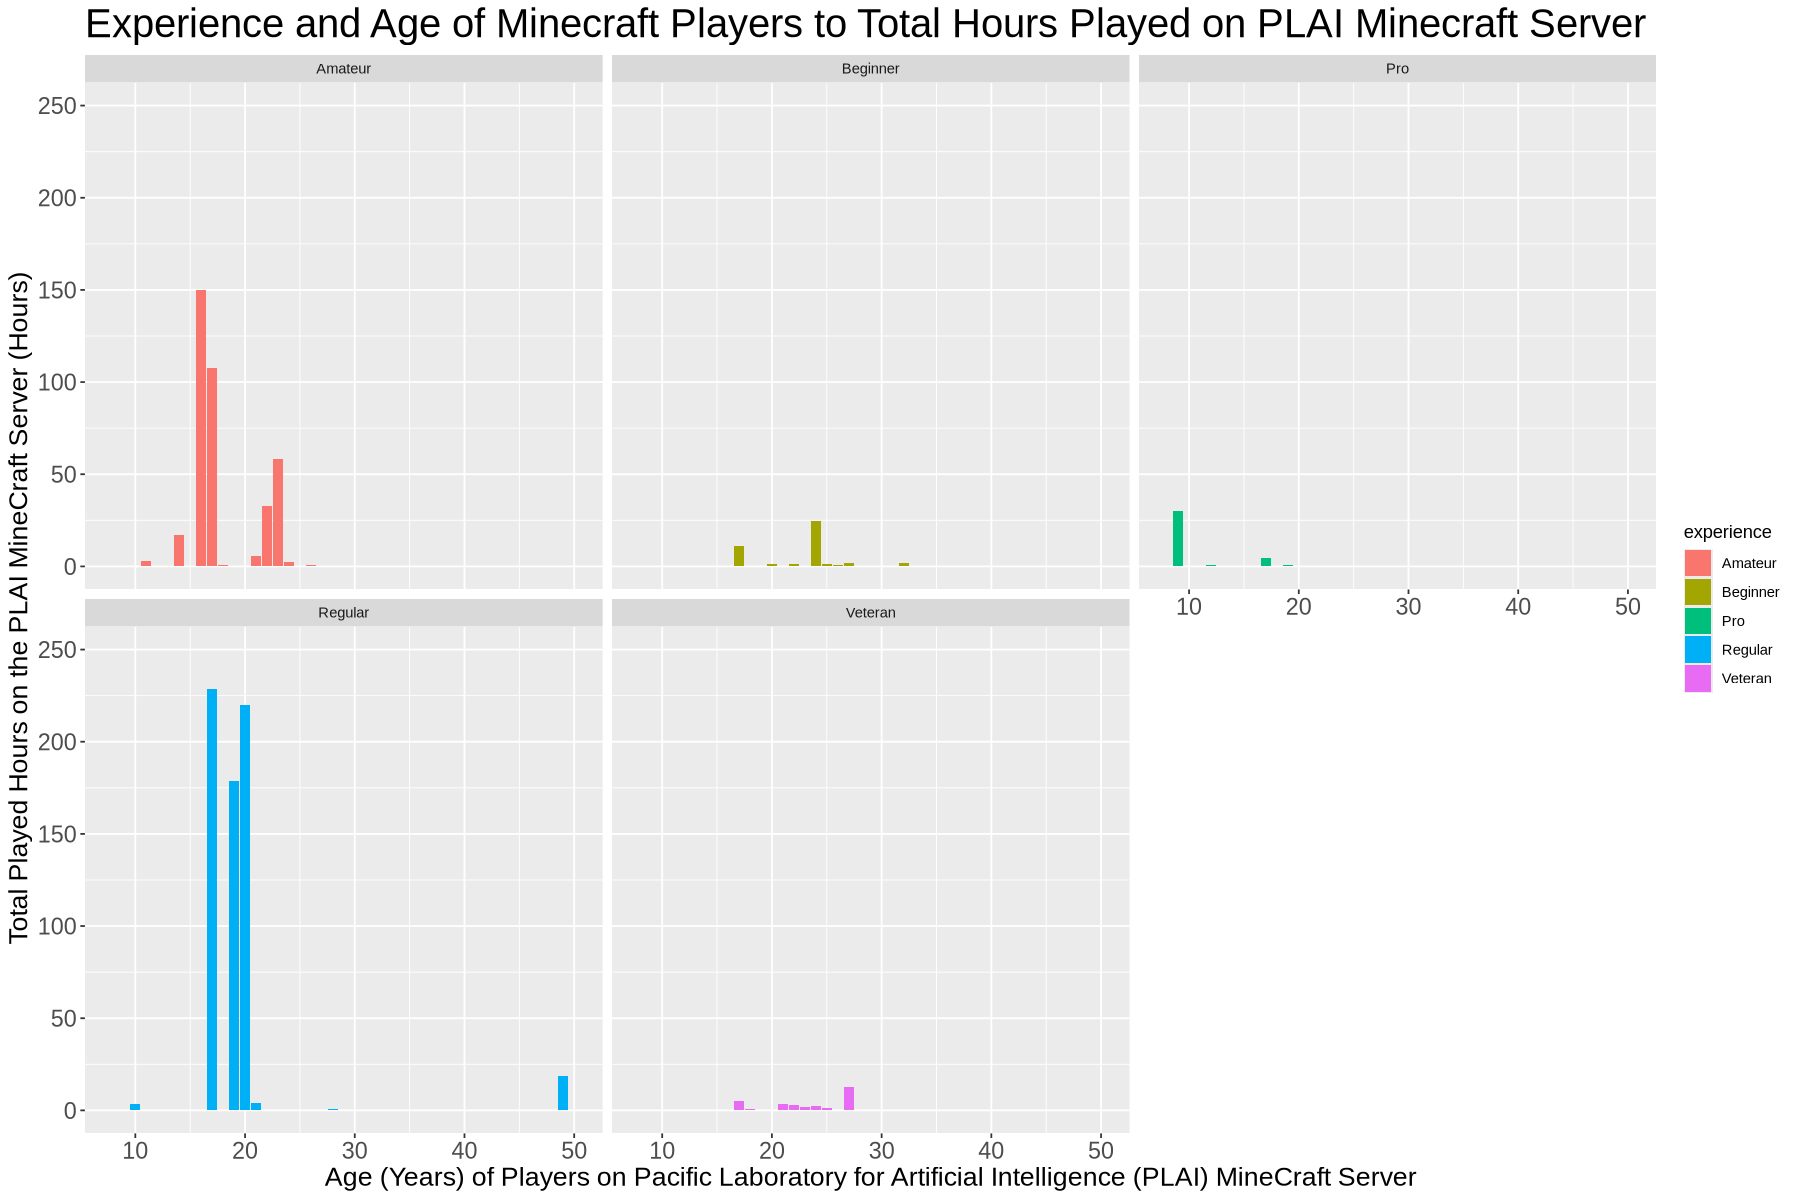

In [59]:
players_plot <- ggplot(players_logical, aes(x = age, y = played_hours, fill = experience)) + 
    geom_col() + 
    ylim(c(0,250)) + 
    labs(x = "Age (Years) of Players on Pacific Laboratory for Artificial Intelligence (PLAI) MineCraft Server", y = "Total Played Hours on the PLAI MineCraft Server (Hours)") +
    ggtitle("Experience and Age of Minecraft Players to Total Hours Played on PLAI Minecraft Server") + 
 theme(plot.title = element_text(size = 24), 
       axis.text.x = element_text(size = 14), # X-axis text size
        axis.text.y = element_text(size = 14), # Y-axis text size
        axis.title.x = element_text(size = 16), # X-axis label size
        axis.title.y = element_text(size = 16)) +
    facet_wrap(~ experience)
options(repr.plot.width = 15, repr.plot.height = 10)
players_plot

**Bar plot of Playing Time by Age by Subscription status**


Most players with the highest playtime had a Minecraft subscription and were aged 8-28, with an outlier at 50. Subscribers peaked at 225 hours around age 20, while non-subscribers maxed at 15 hours around age 15. This visual helps us to assess whether age and subscription access may lead to peak server demand. Issues during analysis may occur if significant outliers may skew the data.

Warning message:
“Removed 34 rows containing missing values or values outside the scale range
(`geom_bar()`).”


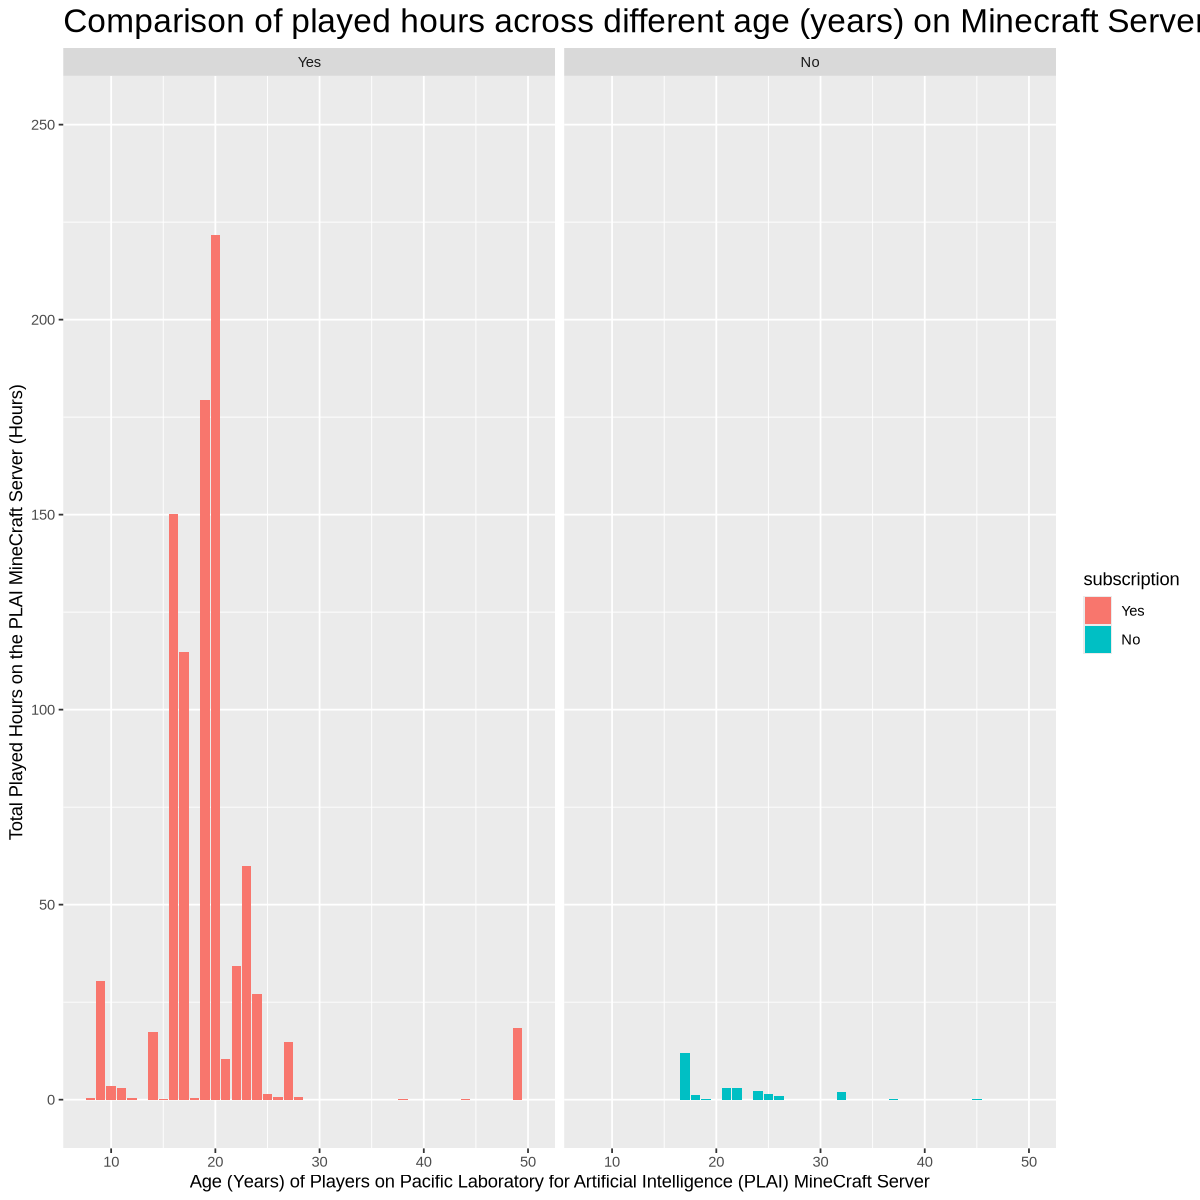

In [60]:
players_bar_plot <- ggplot(players_logical, aes(x = age, y = played_hours, fill = subscription)) + 
    geom_bar(stat = "identity") +
    ylim(c(0,250)) + 
    labs(x = "Age (Years) of Players on Pacific Laboratory for Artificial Intelligence (PLAI) MineCraft Server", y = "Total Played Hours on the PLAI MineCraft Server (Hours)") +
    ggtitle("Comparison of played hours across different age (years) on Minecraft Server") + 
 theme(
    plot.title = element_text(size = 20)  # Adjust title size
  ) + facet_wrap(~ subscription)
options(repr.plot.width = 10, repr.plot.height = 10)
players_bar_plot


**Age and Played Hours on MineCraft Server by Gender**

From the graphs below, the data indicates most players were male between 10 to 20 years old, followed by female players (15 to 25 years old). Those who played the most hours typically were male (10–20 years old). This helps answer the questions by identifying if interests or access increase playtime, aiding in inferring peak server demand. Issues may arise if many players didn't specify their gender.

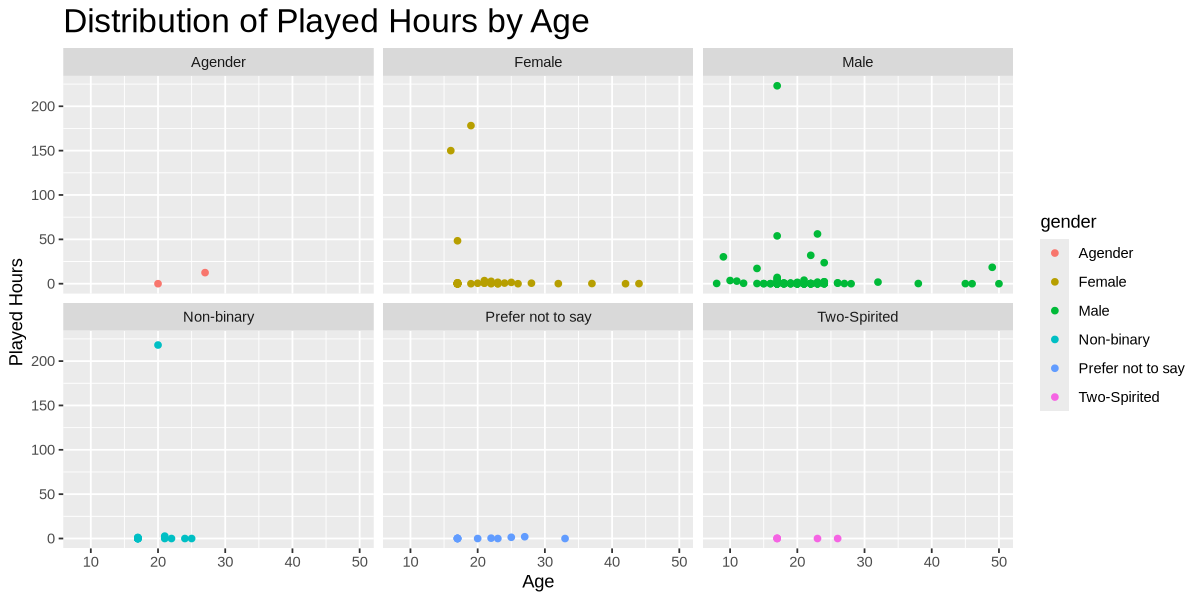

In [62]:
ggplot(players_logical, aes(x = age, y = played_hours, color = gender)) +
    geom_point() +
    labs(x = "Age", y = "Played Hours", title = "Distribution of Played Hours by Age") +
    facet_wrap(~ gender) +
    theme(plot.title = element_text(size = 20))
options(repr.plot.width = 10, repr.plot.height = 5)

# 4. Methods and Plan

The players.csv dataset is best analyzed using KNN regression, as both variables are numerical and non-linear. Both variables are numerical, but the broad age ranges and extreme playtime values are more likely to make their relationship non-linear. However, the model may struggle with too many predictors and cannot predict beyond the dataset’s range. A limitation is other variables, like gender or experience, might have a stronger correlation with hours played, requiring data adjustments. To compare and select a model, both a knn regression and linear regression model using training and test data from players.csv will be compared based on their best k value, and by extension, the accuracy of each model based on the ideal k value. Both linear regression and KNN regression will be tested using RMSE, selecting the best k value through K-fold cross-validation of 5 folds using functions including `vfold_cv()` once data has been read and after wrangling has been completed. The data will be split 75/25 into training and validation using `initial_split()` with `prop = 0.75`, then `testing()` and `training()` to separate the datasets. The KNN model will be fitted using `knn_spec()` with `neighbors = tune()` to determine the optimal k value. The best k is selected based on workflow and grid search, then used to train the model and predict with `predict()`, filtering for RMSE values. Preprocessing includes factor conversion, column removal, and numerical standardization for accuracy.


In [2]:
players_split <- initial_split(players_logical, prop = 0.75, strata = played_hours)
# Since very few people played a lot of hours, we went with strata = played_hours at this time. It could also be Age.
train_data <- training(players_split)
test_data <- testing(players_split)

ERROR: Error in initial_split(players_logical, prop = 0.75, strata = played_hours): could not find function "initial_split"
